In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [27]:
df_0 = pd.read_csv('day.csv')

In [28]:
df_1 = df_0.copy() #making a checkpoint

In [26]:
df_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
df_1.shape

(730, 16)

## Step 1: Data Preprocessing

Dropping columns that are not helpful data analysis, Such as;

instant: it is the serial number.

dteday: it is the date but we already have month and year columns.

casual and registered: cnt has the sum of both of these so no need to specify.

In [8]:
df_1.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [9]:
df_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


Mapping categorial variables from digits to words for better understanding.

In [10]:
df_1.season = df_1.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df_1.mnth = df_1.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df_1.weekday = df_1.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df_1.weathersit = df_1.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [11]:
df_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
df_2 = df_1.copy() #making a checkpoint

In [13]:
df_2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Step 2: EDA

Visualising categorial columns against the target variable cnt

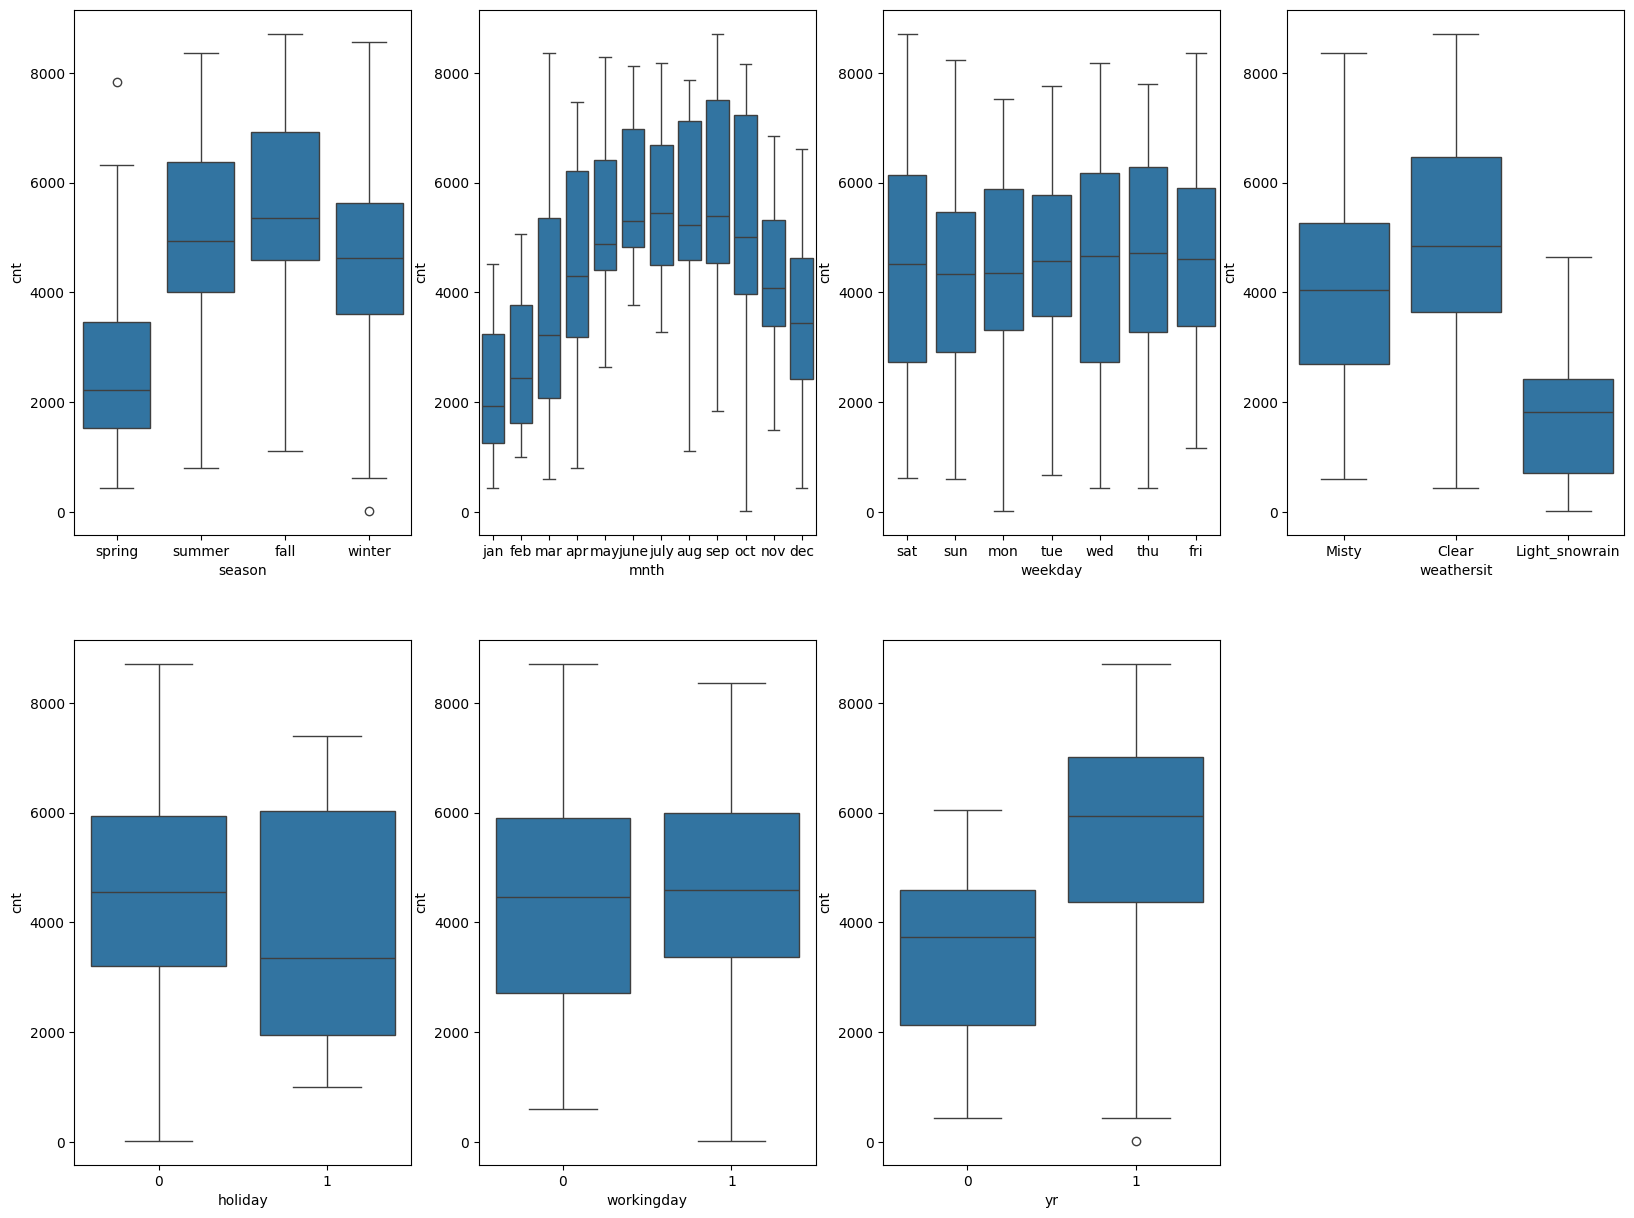

In [14]:
plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_2)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_2)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_2)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_2)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_2)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_2)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df_2)
plt.show()

In [16]:
def plot_cat_columns(column):
    plt.figure(figsize = (15,5))
    plt.subplot(1,2,1)
    sns.barplot(x=column, y='cnt', data=df_2)
    plt.subplot(1,2,2)
    sns.barplot(x=column, y='cnt', data=df_2, hue='yr',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

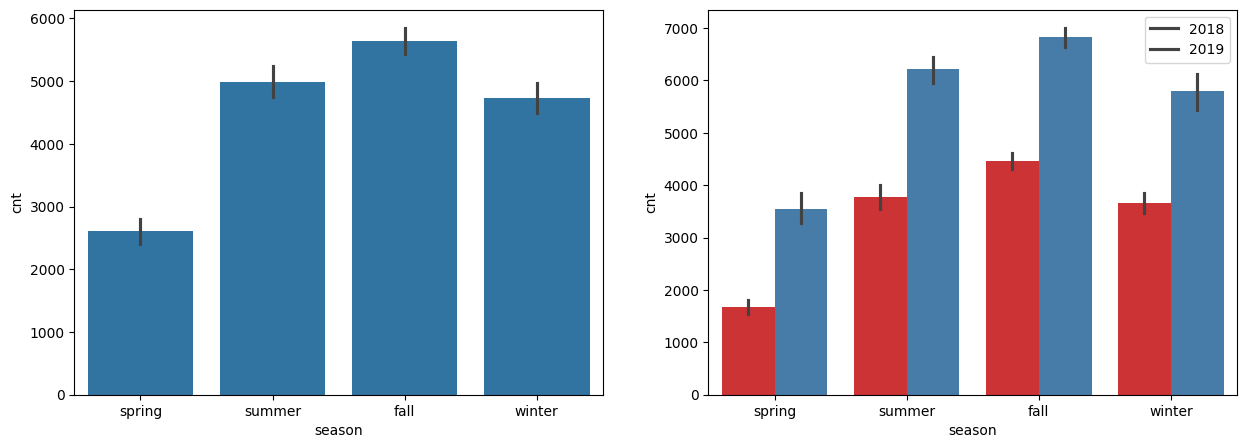

In [17]:
plot_cat_columns('season') #visualising season against cnt

Fall season has the highest booking and there has been a significant increase in all season when compared to last year.

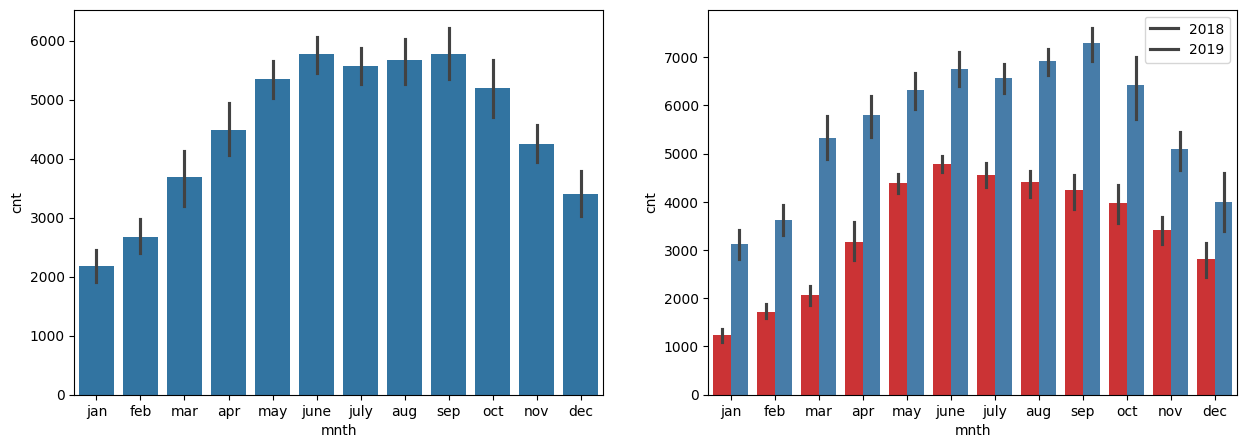

In [18]:
plot_cat_columns('mnth') #visualising month against cnt

This further proves that booking numbers go up the most in fall season as the months with the highest booking come under fall season. Also as previously noticed the sales went up in all months compared to last year.

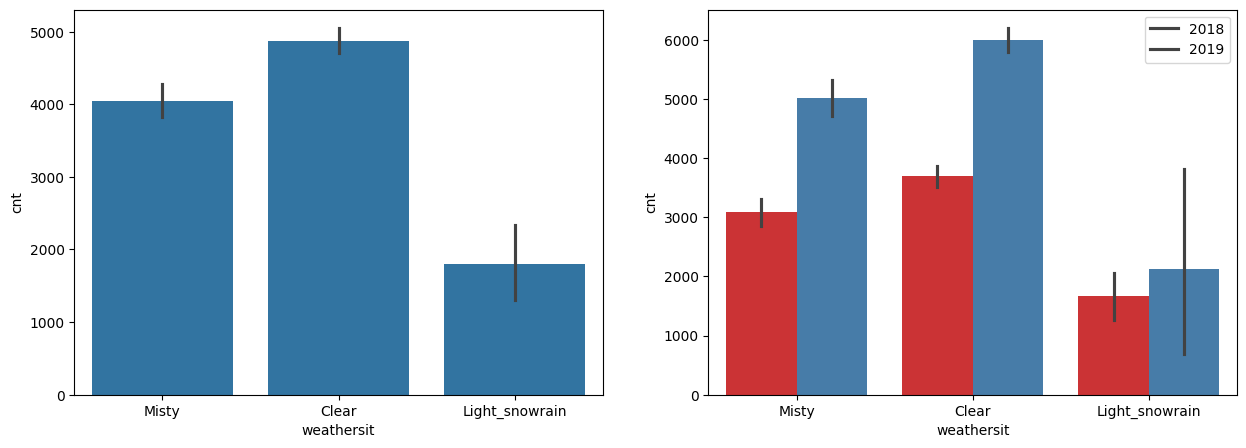

In [19]:
plot_cat_columns('weathersit') #visualising weather against cnt

As expected in clear weather bikes have the highest demand and lowest in light snow/rain. Misty weather can affect visibility which can make riding bikes dangerous thus a slightly lower demand.

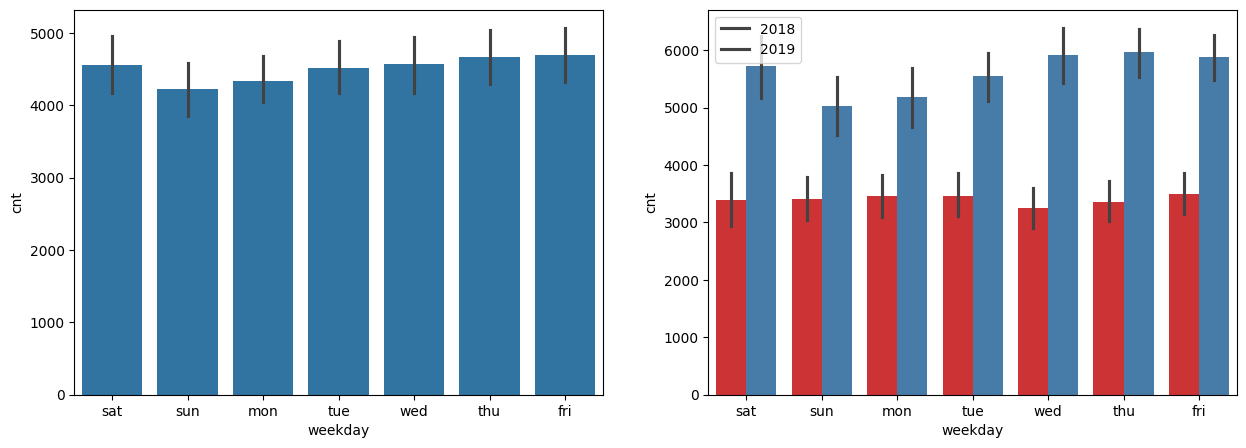

In [20]:
plot_cat_columns('weekday') #visualising weekday against cnt

There is an increasing demand as we go towards weekend (Friday, Saturday) and the lowest on Sunday, we can assume that most of the people return their rented vehicle on Sunday.

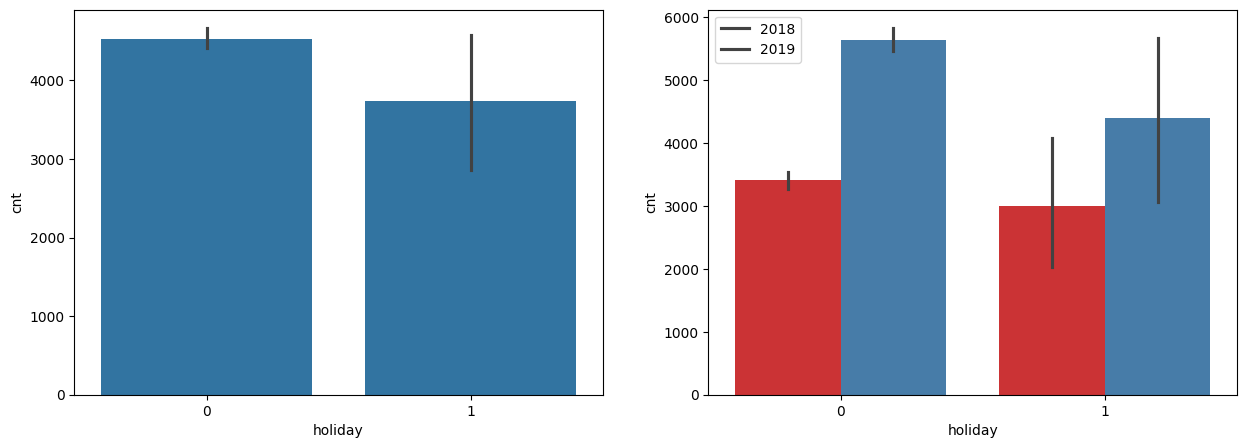

In [21]:
plot_cat_columns('holiday') #visualising holiday against cnt

Since there is a higher demand on days when it is not a holiday, we can assume that the majority of users rent the vehicle to commute to their work instead of recreation.

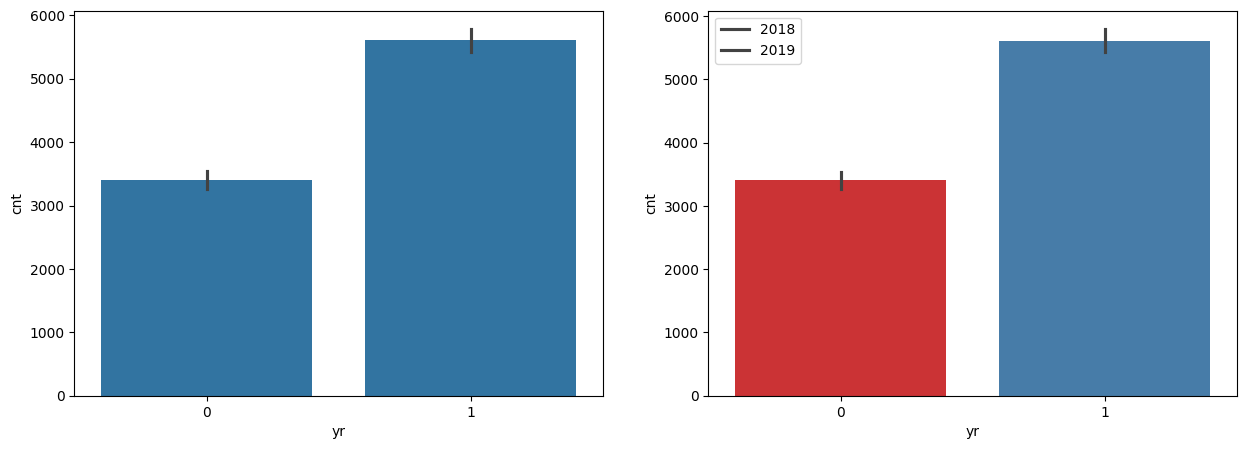

In [23]:
plot_cat_columns('yr') #visualising year against cnt

As seen before there has been a significant increase in cnt compared to last year which means the business is growing.

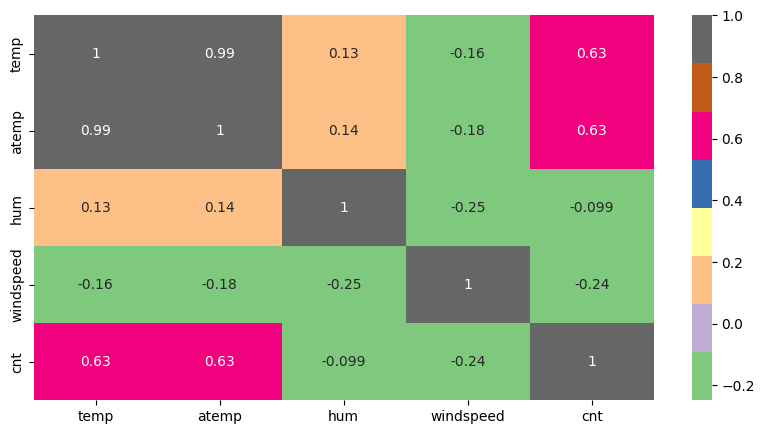

In [30]:
num_variables = ['temp','atemp','hum','windspeed','cnt']
plt.figure(figsize=(10,5))
sns.heatmap(df_2[num_variables].corr(), annot=True, cmap='Accent')
plt.show() #visualising correlation

temp and atemp are highly correlated so we can drop atemp.

In [31]:
df_2.drop(columns=['atemp'],axis=1,inplace=True)
df_2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,1600


In [32]:
df_3 = df_2.copy() #making a checkpoint

In [35]:
# Creating dummy variables
dummy_df = pd.get_dummies(df_3, columns=['season', 'mnth', 'weekday', 'weathersit'], drop_first=False)

# Identify the dummy variable columns
dummy_cols = dummy_df.columns.difference(df_3.columns)

# Convert only the dummy variable columns to integers
dummy_df[dummy_cols] = dummy_df[dummy_cols].astype(int)

dummy_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_fall,season_spring,season_summer,...,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_snowrain,weathersit_Misty
0,0,0,0,14.110847,80.5833,10.749882,985,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,1,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,1,0,...,0,0,0,0,0,0,1,1,0,0


### Step 2: Train Test Split



In [91]:
np.random.seed(0)
input_train, input_test = train_test_split(dummy_df, train_size = 0.8, random_state = 100)
print(input_train.shape)
print(input_test.shape)

(584, 33)
(146, 33)


In [92]:
input_train.head() #train data

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_fall,season_spring,season_summer,...,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_snowrain,weathersit_Misty
367,1,0,1,6.150000,44.1250,24.499957,2236,0,1,0,...,0,0,0,0,0,1,0,1,0,0
648,1,0,1,17.835000,46.3333,12.166932,7570,0,0,0,...,0,0,0,0,1,0,0,1,0,0
44,0,0,1,17.015000,37.5833,27.999836,1913,0,1,0,...,0,1,0,0,0,0,0,1,0,0
705,1,0,1,13.154153,76.4167,8.750200,5008,0,0,0,...,1,0,0,0,0,0,0,0,0,1
379,1,0,0,6.833347,41.9167,16.834286,2311,0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [93]:
input_test.head() #test data

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_fall,season_spring,season_summer,...,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_snowrain,weathersit_Misty
184,0,1,0,29.793347,63.7917,5.459106,6043,1,0,0,...,0,1,0,0,0,0,0,0,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,0,1,...,0,0,0,0,0,0,1,1,0,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,0,...,0,0,0,0,1,0,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,1,0,0,...,0,0,0,0,0,0,1,1,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,0,1,...,0,0,0,0,1,0,0,1,0,0


In [94]:
scaler = MinMaxScaler() #scaling the data
num_vars = ['temp','hum','windspeed','cnt']
input_train[num_vars] = scaler.fit_transform(input_train[num_vars])
input_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_fall,season_spring,season_summer,...,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_snowrain,weathersit_Misty
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.667808,0.537414,0.649499,0.319463,0.515792,0.251712,0.251712,0.246575,...,0.123288,0.148973,0.150685,0.154110,0.135274,0.133562,0.154110,0.630137,0.027397,0.342466
std,0.500241,0.163378,0.471403,0.225336,0.144219,0.168114,0.225336,0.434369,0.434369,0.431387,...,0.329049,0.356367,0.358048,0.361363,0.342309,0.340472,0.361363,0.483181,0.163378,0.474941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.340113,0.535852,0.199177,0.350696,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545191,0.653714,0.294764,0.522837,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.736512,0.752361,0.410413,0.691872,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


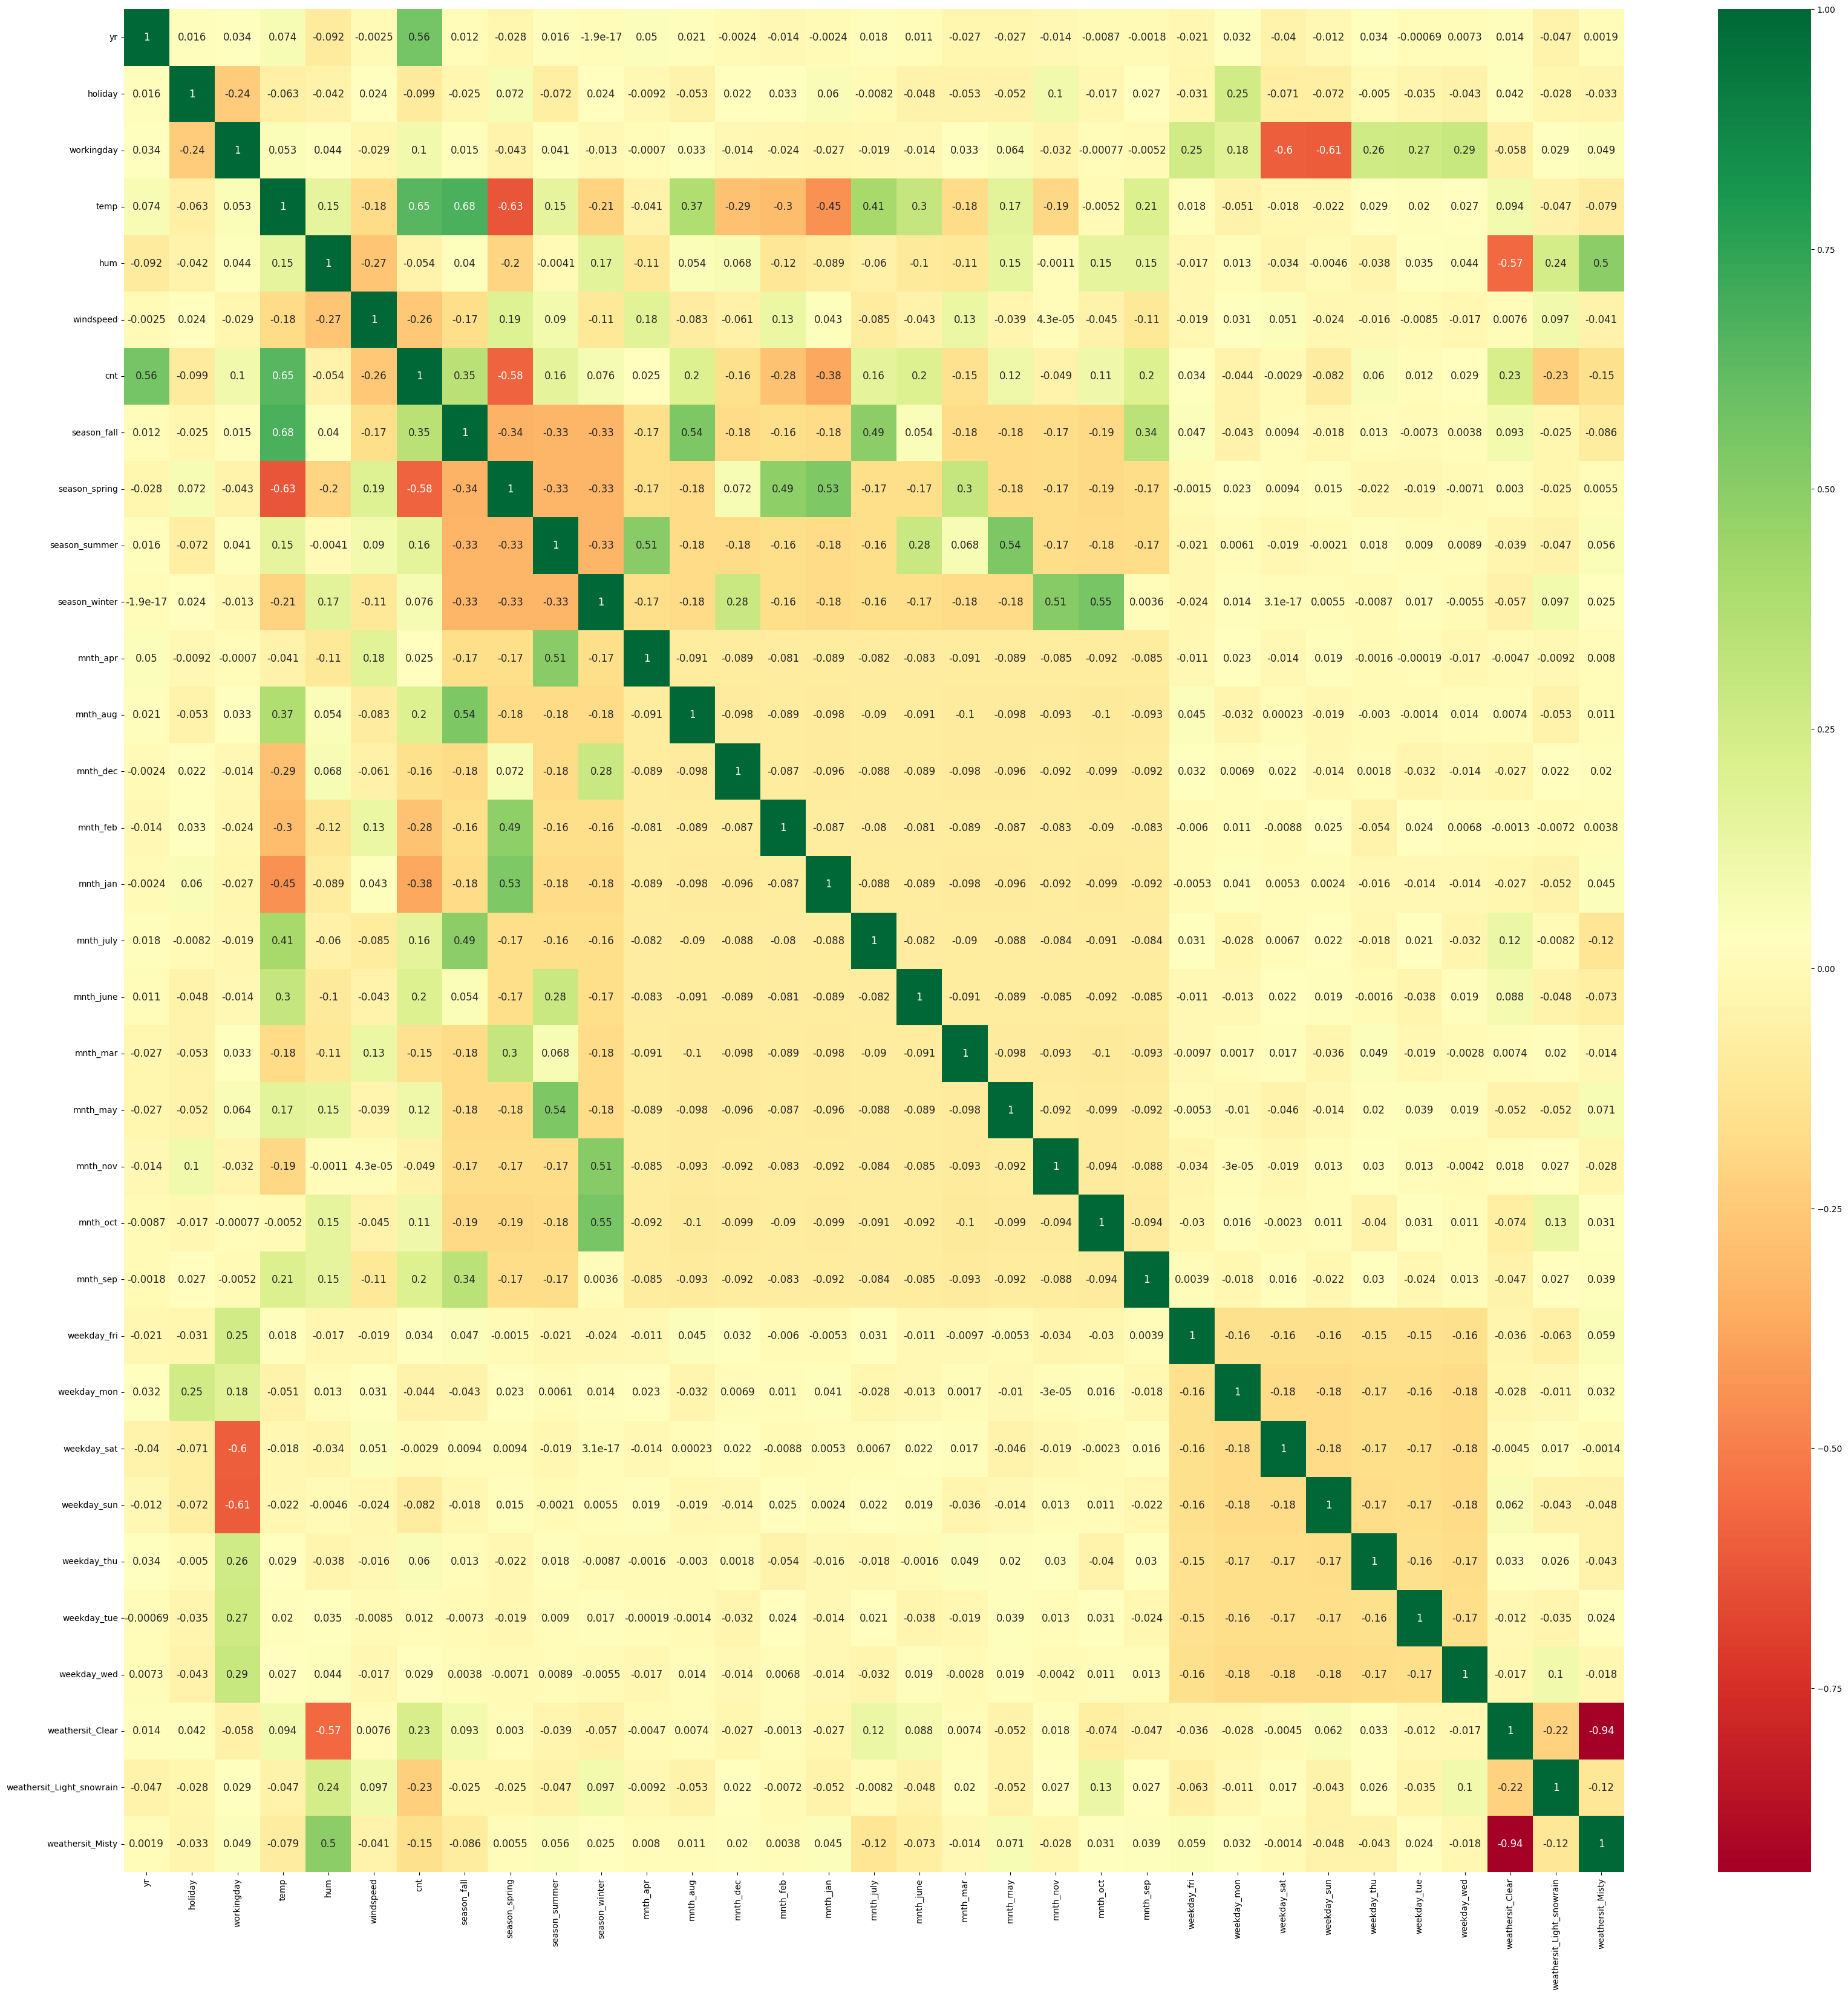

In [80]:
# check the correlation coefficients to see which variables are highly correlated

fig, ax = plt.subplots(figsize=(40,40))
matrix = np.triu(input_train.corr())
sns.heatmap(input_train.corr(), annot = True, cmap="RdYlGn", ax=ax, annot_kws={"size": 12})
plt.show()

The count appears to be correlated with the year variable and temperature. There is a correlation between misty weather and humidity. The spring season shows a strong correlation with the months of January and February, the summer season with May, and the winter season with October and November.

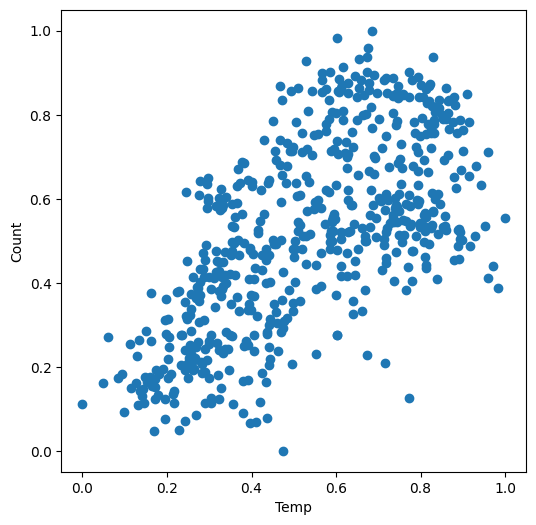

In [95]:
# Visualizing one of the correlation to see the trends via Scatter plot.
cols=['temp']
for column in cols:
    plt.figure(figsize=[6,6])
    plt.scatter(input_train[column], input_train.cnt)
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.show()

Visualisation confirms the positive correlation between temp and cnt.

## Model Building

In [96]:
y_train = input_train.pop('cnt')
X_train = input_train

X_train_sm=sm.add_constant(X_train)

# create a first model
lr=sm.OLS(y_train,X_train_sm)

# fit
lr_model=lr.fit()

lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     125.0
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          3.29e-216
Time:                        16:47:33   Log-Likelihood:                 613.13
No. Observations:                 584   AIC:                            -1170.
Df Residuals:                     556   BIC:                            -1048.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1053      0.017      6.089      0.000       0.071       0.139
yr                            0.2292      0.007     31.107      0.000       0.215       0.244
holiday                      -0.0345      0.017     -1.985      0.048      -0.069      -0.000
workingday                    0.0573      0.008      7.079      0.000       0.041       0.073
temp                          0.4480      0.042     10.610      0.000       0.365       0.531
hum                          -0.1435      0.036     -3.977      0.000      -0.214      -0.073
windspeed                    -0.1816      0.024     -7.654      0.000      -0.228      -0.135
season_fall                   0.0025      0.017      0.153      0.879      -0.030       0.035
season_spring                -0.0533      0.015     -3.583      0.000      -0.082      -0.024
season_summer                 0.0446      0.015      2.894      0.004       0.014       0.075
season_winter                 0.1115      0.016      6.976      0.000       0.080       0.143
mnth_apr                      0.0162      0.019      0.835      0.404      -0.022       0.054
mnth_aug                      0.0328      0.021      1.530      0.126      -0.009       0.075
mnth_dec                     -0.0358      0.018     -2.012      0.045      -0.071      -0.001
mnth_feb                     -0.0126      0.021     -0.612      0.541      -0.053       0.028
mnth_jan                     -0.0430      0.022     -1.972      0.049      -0.086      -0.000
mnth_july                    -0.0188      0.023     -0.809      0.419      -0.064       0.027
mnth_june                     0.0253      0.019      1.307      0.192      -0.013       0.063
mnth_mar                      0.0188      0.016      1.210      0.227      -0.012       0.049
mnth_may                      0.0342      0.020      1.694      0.091      -0.005       0.074
mnth_nov                     -0.0342      0.021     -1.650      0.099      -0.075       0.007
mnth_oct                      0.0291      0.019      1.501      0.134      -0.009       0.067
mnth_sep                      0.0932      0.017      5.342      0.000       0.059       0.128
weekday_fri                   0.0172      0.010      1.790      0.074      -0.002       0.036
weekday_mon                  -0.0068      0.009     -0.786      0.432      -0.024       0.010
weekday_sat                   0.0715      0.010      7.467      0.000       0.053       0.090
weekday_sun                   0.0110      0.010      1.127      0.260      -0.008       0.030
weekday_thu                   0.0077      0.009      0.830      0.407      -0.011       0.026
weekday_tue                  -0.0054      0.009     -0.577      0.564      -0.024       0.013
weekday_wed                   0.0101      0.009      1.134      0.257      

In [97]:
# We will look for Significance (p-value) & VIF of a particular column to check and decide whether to keep that column or not.
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [98]:
calculateVIF(X_train)

,Features,VIF
16,mnth_june,inf
1,holiday,inf
30,weathersit_Light_snowrain,inf
29,weathersit_Clear,inf
28,weekday_wed,inf
27,weekday_tue,inf
26,weekday_thu,inf
25,weekday_sun,inf
24,weekday_sat,inf
23,weekday_mon,inf


Drop a column which has:
1. High P value & High VIF
2. High P value, low VIF or Low P value, High VIF
3. Low P & Low VIF.

In [99]:
X_drop=X_train.drop(['weekday_tue','season_fall'],axis=1)

# add a constant
X_train_sm=sm.add_constant(X_drop)


# create a first model
lr=sm.OLS(y_train,X_train_sm)

# fit
lr_model=lr.fit()

lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     125.0
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          3.29e-216
Time:                        16:47:49   Log-Likelihood:                 613.13
No. Observations:                 584   AIC:                            -1170.
Df Residuals:                     556   BIC:                            -1048.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1052      0.023      4.520      0.000       0.059       0.151
yr                            0.2292      0.007     31.107      0.000       0.215       0.244
holiday                      -0.0373      0.020     -1.837      0.067      -0.077       0.003
workingday                    0.0546      0.010      5.490      0.000       0.035       0.074
temp                          0.4480      0.042     10.610      0.000       0.365       0.531
hum                          -0.1435      0.036     -3.977      0.000      -0.214      -0.073
windspeed                    -0.1816      0.024     -7.654      0.000      -0.228      -0.135
season_spring                -0.0558      0.027     -2.051      0.041      -0.109      -0.002
season_summer                 0.0420      0.024      1.750      0.081      -0.005       0.089
season_winter                 0.1089      0.025      4.420      0.000       0.061       0.157
mnth_apr                      0.0162      0.020      0.827      0.408      -0.022       0.055
mnth_aug                      0.0328      0.021      1.561      0.119      -0.008       0.074
mnth_dec                     -0.0359      0.018     -1.991      0.047      -0.071      -0.000
mnth_feb                     -0.0126      0.021     -0.605      0.546      -0.054       0.028
mnth_jan                     -0.0430      0.022     -1.953      0.051      -0.086       0.000
mnth_july                    -0.0188      0.023     -0.823      0.411      -0.064       0.026
mnth_june                     0.0253      0.019      1.303      0.193      -0.013       0.063
mnth_mar                      0.0188      0.016      1.183      0.237      -0.012       0.050
mnth_may                      0.0342      0.020      1.673      0.095      -0.006       0.074
mnth_nov                     -0.0342      0.021     -1.642      0.101      -0.075       0.007
mnth_oct                      0.0291      0.020      1.485      0.138      -0.009       0.068
mnth_sep                      0.0932      0.017      5.451      0.000       0.060       0.127
weekday_fri                   0.0227      0.014      1.589      0.113      -0.005       0.051
weekday_mon                  -0.0014      0.014     -0.098      0.922      -0.029       0.026
weekday_sat                   0.0742      0.011      6.648      0.000       0.052       0.096
weekday_sun                   0.0137      0.011      1.210      0.227      -0.009       0.036
weekday_thu                   0.0132      0.014      0.941      0.347      -0.014       0.041
weekday_wed                   0.0156      0.014      1.152      0.250      -0.011       0.042
weathersit_Clear              0.1427      0.010     14.991      0.000       0.124       0.161
weathersit_Light_snowrain    -0.1209      0.020     -6.082      0.000      

In [100]:
calculateVIF(X_drop)

,Features,VIF
15,mnth_june,inf
13,mnth_jan,inf
28,weathersit_Light_snowrain,inf
27,weathersit_Clear,inf
24,weekday_sun,inf
23,weekday_sat,inf
20,mnth_sep,inf
19,mnth_oct,inf
18,mnth_nov,inf
17,mnth_may,inf


In [101]:
X_drop=X_drop.drop(['mnth_apr'],axis=1)

# add a constant
X_train_sm=sm.add_constant(X_drop)


# create a first model
lr=sm.OLS(y_train,X_train_sm)

# fit
lr_model=lr.fit()

lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     125.0
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          3.29e-216
Time:                        16:47:57   Log-Likelihood:                 613.13
No. Observations:                 584   AIC:                            -1170.
Df Residuals:                     556   BIC:                            -1048.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1155      0.028      4.138      0.000       0.061       0.170
yr                            0.2292      0.007     31.107      0.000       0.215       0.244
holiday                      -0.0347      0.021     -1.667      0.096      -0.076       0.006
workingday                    0.0571      0.011      5.409      0.000       0.036       0.078
temp                          0.4480      0.042     10.610      0.000       0.365       0.531
hum                          -0.1435      0.036     -3.977      0.000      -0.214      -0.073
windspeed                    -0.1816      0.024     -7.654      0.000      -0.228      -0.135
season_spring                -0.0558      0.027     -2.051      0.041      -0.109      -0.002
season_summer                 0.0420      0.024      1.750      0.081      -0.005       0.089
season_winter                 0.1089      0.025      4.420      0.000       0.061       0.157
mnth_aug                      0.0166      0.031      0.539      0.590      -0.044       0.077
mnth_dec                     -0.0521      0.031     -1.696      0.090      -0.112       0.008
mnth_feb                     -0.0289      0.030     -0.952      0.342      -0.088       0.031
mnth_jan                     -0.0592      0.031     -1.893      0.059      -0.121       0.002
mnth_july                    -0.0350      0.032     -1.095      0.274      -0.098       0.028
mnth_june                     0.0090      0.022      0.404      0.686      -0.035       0.053
mnth_mar                      0.0026      0.023      0.111      0.912      -0.043       0.049
mnth_may                      0.0180      0.019      0.937      0.349      -0.020       0.056
mnth_nov                     -0.0504      0.033     -1.512      0.131      -0.116       0.015
mnth_oct                      0.0128      0.032      0.396      0.692      -0.051       0.076
mnth_sep                      0.0770      0.029      2.635      0.009       0.020       0.134
weekday_fri                   0.0227      0.014      1.589      0.113      -0.005       0.051
weekday_mon                  -0.0014      0.014     -0.098      0.922      -0.029       0.026
weekday_sat                   0.0768      0.012      6.531      0.000       0.054       0.100
weekday_sun                   0.0162      0.012      1.378      0.169      -0.007       0.039
weekday_thu                   0.0132      0.014      0.941      0.347      -0.014       0.041
weekday_wed                   0.0156      0.014      1.152      0.250      -0.011       0.042
weathersit_Clear              0.1461      0.011     13.705      0.000       0.125       0.167
weathersit_Light_snowrain    -0.1175      0.021     -5.690      0.000      -0.158      -0.077
weathersit_Misty              0.0869      0.012      7.203      0.000      

In [102]:
calculateVIF(X_drop)

,Features,VIF
28,weathersit_Misty,inf
23,weekday_sun,inf
2,workingday,inf
27,weathersit_Light_snowrain,inf
26,weathersit_Clear,inf
22,weekday_sat,inf
1,holiday,inf
6,season_spring,10.82
8,season_winter,8.83
7,season_summer,8.31


In [103]:
X_drop=X_drop.drop(['mnth_mar','mnth_june','mnth_oct'],axis=1)

# add a constant
X_train_sm=sm.add_constant(X_drop)


# create a first model
lr=sm.OLS(y_train,X_train_sm)

# fit
lr_model=lr.fit()

lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     141.3
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.30e-219
Time:                        16:48:04   Log-Likelihood:                 612.99
No. Observations:                 584   AIC:                            -1176.
Df Residuals:                     559   BIC:                            -1067.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1191      0.026      4.649      0.000       0.069       0.169
yr                            0.2290      0.007     31.256      0.000       0.215       0.243
holiday                      -0.0336      0.020     -1.646      0.100      -0.074       0.006
workingday                    0.0578      0.010      5.669      0.000       0.038       0.078
temp                          0.4548      0.035     12.882      0.000       0.385       0.524
hum                          -0.1438      0.035     -4.065      0.000      -0.213      -0.074
windspeed                    -0.1826      0.023     -7.786      0.000      -0.229      -0.137
season_spring                -0.0587      0.024     -2.407      0.016      -0.107      -0.011
season_summer                 0.0369      0.021      1.734      0.083      -0.005       0.079
season_winter                 0.1116      0.020      5.490      0.000       0.072       0.152
mnth_aug                      0.0064      0.022      0.290      0.772      -0.037       0.049
mnth_dec                     -0.0599      0.016     -3.645      0.000      -0.092      -0.028
mnth_feb                     -0.0327      0.019     -1.711      0.088      -0.070       0.005
mnth_jan                     -0.0625      0.020     -3.204      0.001      -0.101      -0.024
mnth_july                    -0.0457      0.023     -2.007      0.045      -0.090      -0.001
mnth_may                      0.0138      0.016      0.880      0.379      -0.017       0.045
mnth_nov                     -0.0606      0.017     -3.476      0.001      -0.095      -0.026
mnth_sep                      0.0667      0.019      3.458      0.001       0.029       0.105
weekday_fri                   0.0227      0.014      1.598      0.111      -0.005       0.051
weekday_mon                  -0.0014      0.014     -0.101      0.920      -0.028       0.026
weekday_sat                   0.0777      0.011      6.842      0.000       0.055       0.100
weekday_sun                   0.0172      0.012      1.492      0.136      -0.005       0.040
weekday_thu                   0.0130      0.014      0.936      0.350      -0.014       0.040
weekday_wed                   0.0157      0.013      1.163      0.246      -0.011       0.042
weathersit_Clear              0.1470      0.010     14.632      0.000       0.127       0.167
weathersit_Light_snowrain    -0.1158      0.020     -5.744      0.000      -0.155      -0.076
weathersit_Misty              0.0879      0.012      7.602      0.000       0.065       0.111
==============================================================================
Omnibus:                      103.396   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.255
Skew:                     

In [104]:
calculateVIF(X_drop)

,Features,VIF
25,weathersit_Misty,inf
1,holiday,inf
2,workingday,inf
24,weathersit_Light_snowrain,inf
23,weathersit_Clear,inf
20,weekday_sun,inf
19,weekday_sat,inf
6,season_spring,8.74
7,season_summer,6.56
8,season_winter,6.04


In [105]:
X_drop=X_drop.drop(['weekday_mon','weekday_thu','weekday_wed','mnth_aug'],axis=1)

# add a constant
X_train_sm=sm.add_constant(X_drop)


# create a first model
lr=sm.OLS(y_train,X_train_sm)

# fit
lr_model=lr.fit()

lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     169.8
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          3.19e-223
Time:                        16:48:12   Log-Likelihood:                 611.64
No. Observations:                 584   AIC:                            -1181.
Df Residuals:                     563   BIC:                            -1090.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1235      0.024      5.099      0.000       0.076       0.171
yr                            0.2290      0.007     31.320      0.000       0.215       0.243
holiday                      -0.0329      0.019     -1.750      0.081      -0.070       0.004
workingday                    0.0638      0.009      7.307      0.000       0.047       0.081
temp                          0.4583      0.035     13.060      0.000       0.389       0.527
hum                          -0.1456      0.035     -4.134      0.000      -0.215      -0.076
windspeed                    -0.1841      0.023     -7.867      0.000      -0.230      -0.138
season_spring                -0.0616      0.020     -3.053      0.002      -0.101      -0.022
season_summer                 0.0329      0.015      2.125      0.034       0.002       0.063
season_winter                 0.1076      0.016      6.795      0.000       0.076       0.139
mnth_dec                     -0.0593      0.016     -3.623      0.000      -0.091      -0.027
mnth_feb                     -0.0334      0.019     -1.752      0.080      -0.071       0.004
mnth_jan                     -0.0627      0.019     -3.217      0.001      -0.101      -0.024
mnth_july                    -0.0512      0.017     -3.070      0.002      -0.084      -0.018
mnth_may                      0.0137      0.016      0.874      0.382      -0.017       0.045
mnth_nov                     -0.0596      0.017     -3.439      0.001      -0.094      -0.026
mnth_sep                      0.0641      0.015      4.223      0.000       0.034       0.094
weekday_fri                   0.0159      0.011      1.398      0.163      -0.006       0.038
weekday_sat                   0.0766      0.010      7.327      0.000       0.056       0.097
weekday_sun                   0.0161      0.011      1.512      0.131      -0.005       0.037
weathersit_Clear              0.1474      0.010     15.335      0.000       0.129       0.166
weathersit_Light_snowrain    -0.1121      0.020     -5.633      0.000      -0.151      -0.073
weathersit_Misty              0.0882      0.011      7.944      0.000       0.066       0.110
==============================================================================
Omnibus:                      104.762   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.520
Skew:                          -0.873   Prob(JB):                     1.50e-65
Kurtosis:                       6.036   Cond. No.                     1.90e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.47e-30. This might indicate that

In [106]:
calculateVIF(X_drop)

,Features,VIF
21,weathersit_Misty,inf
1,holiday,inf
2,workingday,inf
20,weathersit_Light_snowrain,inf
19,weathersit_Clear,inf
18,weekday_sun,inf
17,weekday_sat,inf
6,season_spring,5.99
3,temp,4.88
8,season_winter,3.67


In [107]:
X_drop=X_drop.drop(['weathersit_Light_snowrain','weathersit_Clear','weekday_sun','weekday_sat'],axis=1)

# add a constant
X_train_sm=sm.add_constant(X_drop)


# create a first model
lr=sm.OLS(y_train,X_train_sm)

# fit
lr_model=lr.fit()

lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     148.8
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.02e-200
Time:                        16:48:16   Log-Likelihood:                 552.34
No. Observations:                 584   AIC:                            -1067.
Df Residuals:                     565   BIC:                            -983.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3748      0.038      9.828      0.000       0.300       0.450
yr                   0.2268      0.008     28.088      0.000       0.211       0.243
holiday             -0.0754      0.025     -2.982      0.003      -0.125      -0.026
workingday           0.0136      0.009      1.510      0.132      -0.004       0.031
temp                 0.5176      0.038     13.520      0.000       0.442       0.593
hum                 -0.3015      0.036     -8.490      0.000      -0.371      -0.232
windspeed           -0.2274      0.025     -8.976      0.000      -0.277      -0.178
season_spring       -0.0529      0.022     -2.376      0.018      -0.097      -0.009
season_summer        0.0385      0.017      2.252      0.025       0.005       0.072
season_winter        0.1119      0.017      6.398      0.000       0.078       0.146
mnth_dec            -0.0430      0.018     -2.387      0.017      -0.078      -0.008
mnth_feb            -0.0253      0.021     -1.202      0.230      -0.067       0.016
mnth_jan            -0.0435      0.021     -2.029      0.043      -0.086      -0.001
mnth_july           -0.0603      0.018     -3.274      0.001      -0.096      -0.024
mnth_may             0.0226      0.017      1.302      0.193      -0.011       0.057
mnth_nov            -0.0497      0.019     -2.600      0.010      -0.087      -0.012
mnth_sep             0.0672      0.017      4.005      0.000       0.034       0.100
weekday_fri          0.0207      0.013      1.654      0.099      -0.004       0.045
weathersit_Misty    -0.0242      0.010     -2.427      0.016      -0.044      -0.005
==============================================================================
Omnibus:                      133.553   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              427.963
Skew:                          -1.066   Prob(JB):                     1.17e-93
Kurtosis:                       6.611   Cond. No.                         24.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
calculateVIF(X_drop)

,Features,VIF
4,hum,27.31
3,temp,17.13
6,season_spring,5.53
5,windspeed,4.69
8,season_winter,3.78
2,workingday,3.39
7,season_summer,3.30
11,mnth_jan,2.34
0,yr,2.13
17,weathersit_Misty,2.13


VIF values seems to be good now, but we will try to decrese it further.

In [109]:
X_drop=X_drop.drop(['mnth_july','mnth_sep','mnth_jan','mnth_may','mnth_nov'],axis=1)

# add a constant
X_train_sm=sm.add_constant(X_drop)


# create a first model
lr=sm.OLS(y_train,X_train_sm)

# fit
lr_model=lr.fit()

lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     185.5
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          6.07e-195
Time:                        16:48:25   Log-Likelihood:                 525.20
No. Observations:                 584   AIC:                            -1022.
Df Residuals:                     570   BIC:                            -961.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3313      0.036      9.208      0.000       0.261       0.402
yr                   0.2261      0.008     26.944      0.000       0.210       0.243
holiday             -0.0798      0.026     -3.053      0.002      -0.131      -0.028
workingday           0.0147      0.009      1.568      0.117      -0.004       0.033
temp                 0.5415      0.034     15.716      0.000       0.474       0.609
hum                 -0.2688      0.036     -7.387      0.000      -0.340      -0.197
windspeed           -0.2267      0.026     -8.635      0.000      -0.278      -0.175
season_spring       -0.0616      0.021     -2.913      0.004      -0.103      -0.020
season_summer        0.0534      0.014      3.907      0.000       0.027       0.080
season_winter        0.1062      0.017      6.392      0.000       0.074       0.139
mnth_dec            -0.0237      0.016     -1.478      0.140      -0.055       0.008
mnth_feb            -0.0002      0.018     -0.013      0.989      -0.036       0.036
weekday_fri          0.0201      0.013      1.541      0.124      -0.006       0.046
weathersit_Misty    -0.0230      0.010     -2.211      0.027      -0.043      -0.003
==============================================================================
Omnibus:                      112.823   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.160
Skew:                          -0.937   Prob(JB):                     6.71e-71
Kurtosis:                       6.126   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
calculateVIF(X_drop)

,Features,VIF
4,hum,24.49
3,temp,14.07
5,windspeed,4.54
6,season_spring,4.09
2,workingday,3.38
8,season_winter,2.99
7,season_summer,2.18
0,yr,2.10
12,weathersit_Misty,2.10
10,mnth_feb,1.45


In [111]:
X_drop=X_drop.drop(['mnth_dec','mnth_feb'],axis=1)

# add a constant
X_train_sm=sm.add_constant(X_drop)


# create a first model
lr=sm.OLS(y_train,X_train_sm)

# fit
lr_model=lr.fit()

lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     218.9
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          8.38e-197
Time:                        16:48:31   Log-Likelihood:                 524.07
No. Observations:                 584   AIC:                            -1024.
Df Residuals:                     572   BIC:                            -971.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3255      0.036      9.099      0.000       0.255       0.396
yr                   0.2257      0.008     26.903      0.000       0.209       0.242
holiday             -0.0798      0.026     -3.052      0.002      -0.131      -0.028
workingday           0.0148      0.009      1.583      0.114      -0.004       0.033
temp                 0.5517      0.034     16.334      0.000       0.485       0.618
hum                 -0.2732      0.036     -7.533      0.000      -0.344      -0.202
windspeed           -0.2245      0.026     -8.568      0.000      -0.276      -0.173
season_spring       -0.0600      0.020     -2.933      0.003      -0.100      -0.020
season_summer        0.0551      0.014      4.048      0.000       0.028       0.082
season_winter        0.1044      0.017      6.299      0.000       0.072       0.137
weekday_fri          0.0192      0.013      1.472      0.142      -0.006       0.045
weathersit_Misty    -0.0222      0.010     -2.138      0.033      -0.043      -0.002
==============================================================================
Omnibus:                      109.093   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.342
Skew:                          -0.915   Prob(JB):                     8.18e-67
Kurtosis:                       6.026   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
calculateVIF(X_drop)

,Features,VIF
4,hum,23.81
3,temp,13.67
5,windspeed,4.53
6,season_spring,3.65
2,workingday,3.38
8,season_winter,2.92
7,season_summer,2.17
0,yr,2.09
10,weathersit_Misty,2.09
9,weekday_fri,1.23


In [113]:
X_drop=X_drop.drop(['hum'],axis=1)

# add a constant
X_train_sm=sm.add_constant(X_drop)


# create a first model
lr=sm.OLS(y_train,X_train_sm)

# fit
lr_model=lr.fit()

lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     214.3
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.81e-186
Time:                        16:48:37   Log-Likelihood:                 496.45
No. Observations:                 584   AIC:                            -970.9
Df Residuals:                     573   BIC:                            -922.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1768      0.031      5.657      0.000       0.115       0.238
yr                   0.2346      0.009     26.972      0.000       0.218       0.252
holiday             -0.0780      0.027     -2.849      0.005      -0.132      -0.024
workingday           0.0131      0.010      1.338      0.181      -0.006       0.032
temp                 0.5053      0.035     14.526      0.000       0.437       0.574
windspeed           -0.1784      0.027     -6.683      0.000      -0.231      -0.126
season_spring       -0.0684      0.021     -3.194      0.001      -0.110      -0.026
season_summer        0.0504      0.014      3.537      0.000       0.022       0.078
season_winter        0.0831      0.017      4.858      0.000       0.049       0.117
weekday_fri          0.0259      0.014      1.902      0.058      -0.001       0.053
weathersit_Misty    -0.0640      0.009     -6.949      0.000      -0.082      -0.046
==============================================================================
Omnibus:                      142.705   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.402
Skew:                          -1.113   Prob(JB):                    4.38e-108
Kurtosis:                       6.920   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
calculateVIF(X_drop)

,Features,VIF
4,windspeed,4.53
3,temp,4.43
2,workingday,3.33
5,season_spring,2.17
0,yr,2.08
6,season_summer,1.85
7,season_winter,1.69
9,weathersit_Misty,1.52
8,weekday_fri,1.23
1,holiday,1.10


This model appears to be effective, as there is very low multicollinearity among the predictors, and the p-values for all the predictors are significant.

### Evaluation

In [115]:
input_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_fall,season_spring,season_summer,...,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_snowrain,weathersit_Misty
184,0,1,0,29.793347,63.7917,5.459106,6043,1,0,0,...,0,1,0,0,0,0,0,0,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,0,1,...,0,0,0,0,0,0,1,1,0,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,0,...,0,0,0,0,1,0,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,1,0,0,...,0,0,0,0,0,0,1,1,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,0,1,...,0,0,0,0,1,0,0,1,0,0


In [116]:
input_test_2 = input_test.copy()

In [117]:

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','hum','windspeed','cnt']
input_test_2[num_vars] = scaler.transform(input_test_2[num_vars])
input_test_2.head()
input_test_2.describe()
Y_test=input_test_2.pop('cnt')
X_test=input_test_2
# add a constant
x_test_sm = sm.add_constant(X_test)
x_test_sm.head()
X_train_sm.columns
x_test_sm=x_test_sm.drop(['weekday_tue','season_fall','mnth_apr','mnth_mar','mnth_june','mnth_oct','weekday_mon','weekday_thu','weekday_wed','mnth_aug','mnth_july','mnth_sep','mnth_jan','mnth_dec','mnth_feb','mnth_may','mnth_nov', 'hum' , 'weathersit_Light_snowrain','weathersit_Clear','weekday_sun','weekday_sat'],axis=1)
x_test_sm.columns
#Predict
y_test_pred=lr_model.predict(x_test_sm)

In [118]:
r2_score(y_true=Y_test,y_pred=y_test_pred)

0.7402662309840677

The value we got is 0.740 which is similar to that of the trained set i.e. 0.789.

In [119]:
r2=0.7402662309840677
n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.6667133052450427